<h1>Logistic regression weight update process</h1>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]
# Initialize coefficients
W = np.zeros(X.shape[1])
# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Define the logistic loss ( binary cross - entropy ) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon) # Clip to avoid log (0)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [37]:
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_G = []
# Performing Gradient Descent
for i in range(iterations):
    # Compute the predicted probabilities
    y_pred = sigmoid(np.dot(X, W))
    
    # Compute the gradient of the loss function
    gradient = np.dot(X.T, (y_pred - y)) / len(y)
    
    # Update the weights using the gradient and learning rate
    W -= learning_rate * gradient
    
    # Calculate the binary cross-entropy loss and append it to the history
    # loss = log_loss(y, y_pred)
    loss = np.mean(log_loss(y, y_pred))
    loss_history_G.append(loss)

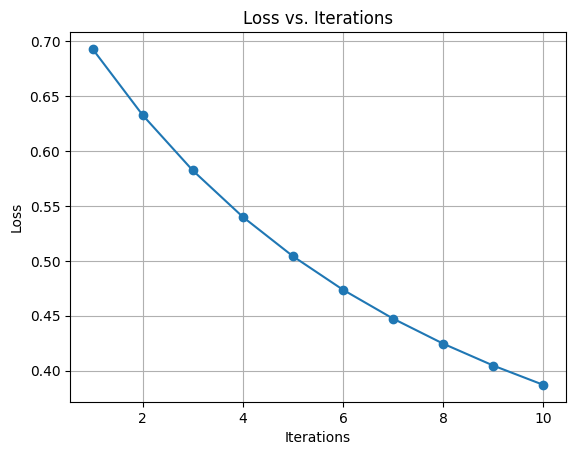

In [48]:
# Plot the loss with respect to the number of iterations
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, np.reshape(loss_history_G, (iterations, 1)), marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

In [39]:
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_N = []
# Performing Newton's Method
for i in range(iterations):
    # Compute the predicted probabilities
    y_pred = sigmoid(np.dot(X, W))
    # Calculate the diagonal matrix S
    S = np.diag(y_pred * (1 - y_pred))
    # Compute the gradient of the loss function
    gradient = np.dot(X.T, (y_pred - y)) / len(y)
    # Compute the Hessian matrix
    H = np.dot(np.dot(X.T, S), X) / len(y)
    # Update the weights using Newton's method
    W -= np.dot(np.linalg.inv(H), gradient)
    # Calculate the binary cross-entropy loss and append it to the history
    loss = np.mean(log_loss(y, y_pred))
    loss_history_N.append(loss)

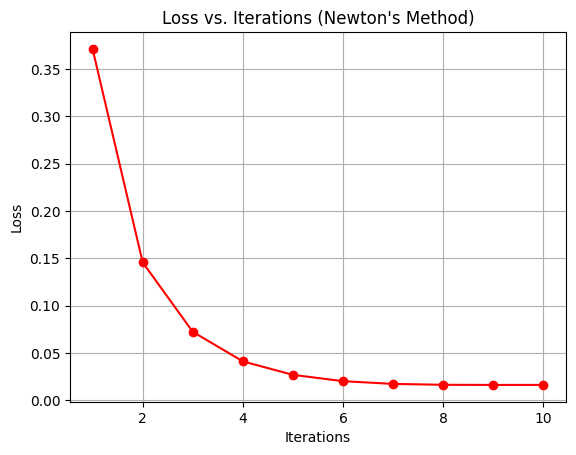

In [49]:
# Plot the loss with respect to the number of iterations
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, np.reshape(loss_history_N, (iterations, 1)), marker='o', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Newton\'s Method)')
plt.grid(True)
plt.show()

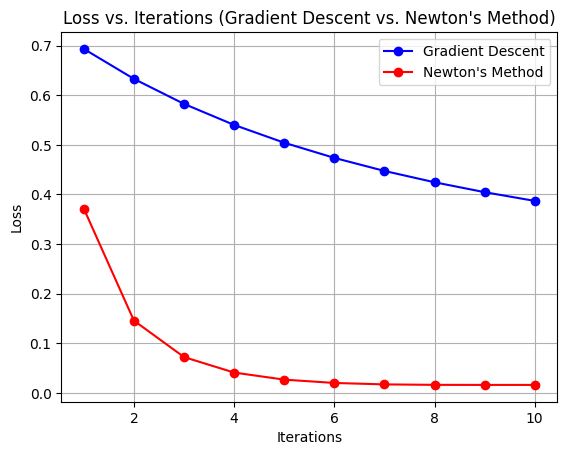

In [50]:
# Plot the loss with respect to the number of iterations for both methods
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, np.reshape(loss_history_G, (iterations, 1)), marker='o', color='blue', label='Gradient Descent')
plt.plot(iteration_numbers, np.reshape(loss_history_N, (iterations, 1)), marker='o', color='red', label='Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Gradient Descent vs. Newton\'s Method)')
plt.grid(True)
plt.legend()
plt.show()

<h1>Perform grid search for hyperparameter tuning</h1>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state
# data loading
train_samples = 500
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)


In [58]:
# Create a pipeline with scaling and Lasso logistic regression
lasso_logistic_pipeline = Pipeline([
   ('scaler', StandardScaler()), # Standardize feature
   ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))])
# Define the parameter grid for hyperparameter tuning
param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}

In [55]:
# Create GridSearchCV to find the optimal value of C
grid_search = GridSearchCV(lasso_logistic_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get the best value of C
best_C = grid_search.best_params_['lasso_logistic__C']
print('Best C:', best_C)

Best C: 0.31622776601683794


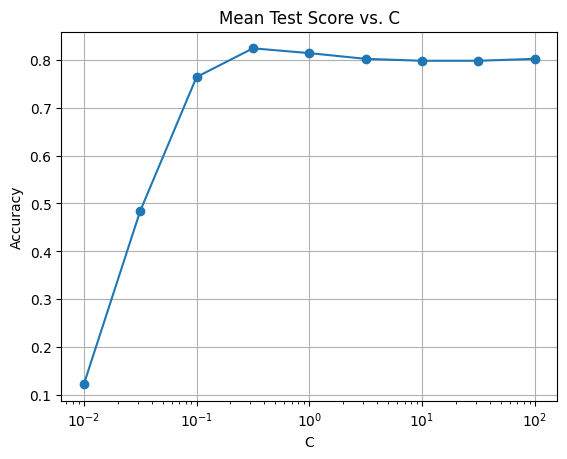

In [56]:
# Extract the hyperparameter values and corresponding mean test scores
C_values = np.logspace(-2, 2, 9)
mean_test_scores = grid_search.cv_results_['mean_test_score']
# Plot the mean test score against C
plt.semilogx(C_values, mean_test_scores, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Mean Test Score vs. C') 
plt.grid(True)
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Make predictions on the test set
y_pred = grid_search.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
# Print the metrics
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.85
Confusion Matrix:
 [[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8588888888888888
Recall: 0.85518759018759
F1 Score: 0.8526539913624311


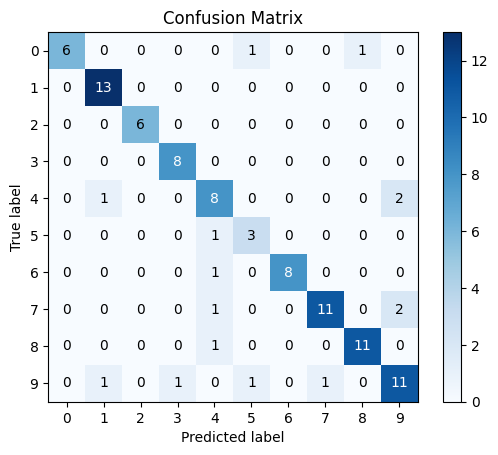

In [60]:
# Plot the confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix')
plt.show()